# Install face-alignment package
Environment: Google colab

In [1]:
# Update pyorch to 0.4
#!pip install --upgrade torch==0.4

In [2]:
#!git init .
#!git remote add origin https://github.com/1adrianb/face-alignment.git
#!git fetch origin
#!git checkout master

In [3]:
#%%capture
#!apt update
#!apt install -y cmake

**Install dlib (CUDA enabled or CPU version)**

CUDA enabled dlib

In [4]:
#%%capture
#!git clone https://github.com/davisking/dlib.git dlib/
#cd dlib
#!python setup.py install –yes USE_AVX_INSTRUCTIONS –yes DLIB_USE_CUDA

dlib w/o CUDA

In [5]:
# CPU dlib
#!pip install dlib

In [6]:
#!ls

In [7]:
#import torch
#torch.__version__

# Generate binary masks

```bash
    Inputs:
        Images from ./faceA and ./faceB
    Outputs:
        Eyes binary masks, which are saved to ./binary_masks/faceA_eyes and ./binary_masks/faceB_eyes respectively
```

In [8]:
#!pip install --upgrade face_alignment
import face_alignment

In [9]:
import cv2
import numpy as np
from glob import glob
from pathlib import PurePath, Path
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
dir_faceA = "./faceA"
dir_faceB = "./faceB"
dir_bm_faceA_eyes = "./binary_masks/faceA_eyes"
dir_bm_faceB_eyes = "./binary_masks/faceB_eyes"

In [11]:
fns_faceA = glob(f"{dir_faceA}/*.*")
fns_faceB = glob(f"{dir_faceB}/*.*")

In [12]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cuda',flip_input=False)

In [13]:
# !mkdir -p binary_masks/faceA_eyes
Path(f"binary_masks/faceA_eyes").mkdir(parents=True, exist_ok=True)
# !mkdir -p binary_masks/faceB_eyes
Path(f"binary_masks/faceB_eyes").mkdir(parents=True, exist_ok=True)

In [14]:
fns_face_not_detected = []

for idx, fns in enumerate([fns_faceA, fns_faceB]):
    if idx == 0:
        save_path = dir_bm_faceA_eyes
    elif idx == 1:
        save_path = dir_bm_faceB_eyes     
    
    # create binary mask for each training image
    for fn in fns:
        raw_fn = PurePath(fn).parts[-1]

        x = plt.imread(fn)
        x = cv2.resize(x, (256,256))
        preds = fa.get_landmarks(x)
        
        if preds is not None:
            preds = preds[0]
            mask = np.zeros_like(x)
            
            # Draw right eye binary mask
            pnts_right = [(preds[i,0],preds[i,1]) for i in range(36,42)]
            hull = cv2.convexHull(np.array(pnts_right)).astype(np.int32)
            mask = cv2.drawContours(mask,[hull],0,(255,255,255),-1)

            # Draw left eye binary mask
            pnts_left = [(preds[i,0],preds[i,1]) for i in range(42,48)]
            hull = cv2.convexHull(np.array(pnts_left)).astype(np.int32)
            mask = cv2.drawContours(mask,[hull],0,(255,255,255),-1)

            # Draw mouth binary mask
            pnts_mouth = [(preds[i,0],preds[i,1]) for i in range(48,60)]
            hull = cv2.convexHull(np.array(pnts_mouth)).astype(np.int32)
            mask = cv2.drawContours(mask,[hull],0,(255,255,255),-1)
            
            
            mask = cv2.dilate(mask, np.ones((13,13), np.uint8), iterations=1)
            mask = cv2.GaussianBlur(mask, (7,7), 0)
            
        else:
            mask = np.zeros_like(x)
            print(f"No faces were detected in image '{fn}''")
            fns_face_not_detected.append(fn)
        
        plt.imsave(fname=f"{save_path}/{raw_fn}", arr=mask, format="jpg")

In [15]:
num_faceA = len(glob(dir_faceA+"/*.*"))
num_faceB = len(glob(dir_faceB+"/*.*"))

print("Nuber of processed images: "+ str(num_faceA + num_faceB))
print("Number of image(s) with no face detected: " + str(len(fns_face_not_detected)))

Nuber of processed images: 268
Number of image(s) with no face detected: 0


# Randomly diaplay a face image and its result binary mask

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


ValueError: operands could not be broadcast together with shapes (256,256,3) (312,312,3) 

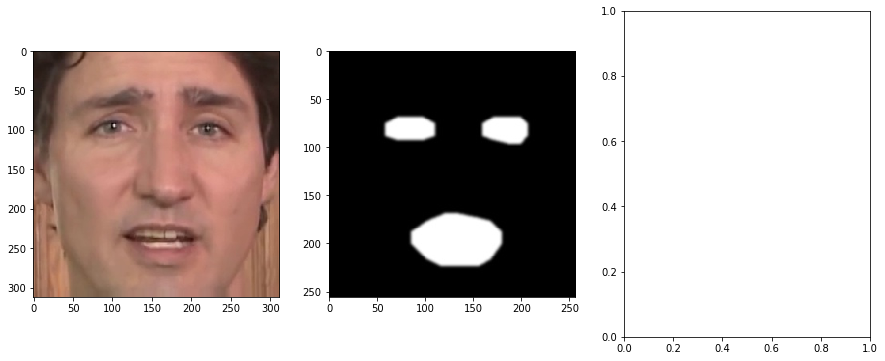

In [16]:
face = np.random.choice(["A","B"])

dir_face = dir_faceA if face == "A" else dir_faceB
fns_face = fns_faceA if face == "A" else fns_faceB
num_face = len(glob(dir_face+"/*.*"))
rand_idx = np.random.randint(num_face)
rand_fn = fns_face[rand_idx]
raw_fn = PurePath(rand_fn).parts[-1]
mask_fn = f"{dir_bm_faceA_eyes}/{raw_fn}" if face == "A" else f"{dir_bm_faceB_eyes}/{raw_fn}"
im = plt.imread(rand_fn)
mask = plt.imread(mask_fn)

if rand_fn in fns_face_not_detected:
    print("========== No faces were detected in this image! ==========")

fig = plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.grid('off')
plt.imshow(im)
plt.subplot(1,3,2)
plt.grid('off')
plt.imshow(mask)
plt.subplot(1,3,3)
plt.grid('off')
plt.imshow((mask/255*im).astype(np.uint8))

#fa.get_landmarks(x)

# Randomly diaplay an image that has no face detected

In [ ]:
num_no_face_img = len(fns_face_not_detected)
rand_idx = np.random.randint(num_no_face_img)
x = plt.imread(fns_face_not_detected[rand_idx])
#x = cv2.resize(x, (256,256))

plt.grid('off')
plt.imshow(x)

#fa.get_landmarks(x)